# Data Science Academy
### Linguagem Python e Power BI Para Manipulação de Dados
### Mini-Projeto 3
### Dashboard de Recursos Humanos Com Power BI e Linguagem Python


## Definição do Problema

A empresa ZuZa Inc coletou dados do ano anterior com diversos atributos de funcionários de todos os setores. O objetivo é estudar a relação desses atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usado mais tarde para construir modelos de Machine Learning para prever se um colaborador será ou não promovido.

Essas são as perguntas que devem ser respondidas:

- Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?
- Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?
- Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?
- Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?
- Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?
- Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?
- Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

Seu trabalho é limpar e preparar os dados e então construir um dashboard no Power BI para apresentar seus resultados.

# Verificando a Versao do Python

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


# Chamando as Bibliotecas

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt


# Carregando os dados

In [5]:
dadosRH = pd.read_csv ('dadosRH.csv')

In [7]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [11]:
dadosRH.shape

(54808, 11)

# Analise Exploratoria, Limpeza e Transformacao de Dados
###### Bom sempre fazer Analise Exploratoria
Manipulacao de dados e correcao de eventuais problemas

In [12]:
# Metodo para verificar dados nulos e contagem das tabelas com os dados nulos
# O metod retorna os dados nulos.
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [16]:
# O metodo a baixo faz um agrupamento na tabela pela coluna @Educacao e faz uma conta dos registros para cada valor da 
# coluna Educao
# O @groupby nao considera valores ausentes WARNING!!!!!
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


C:\Users\Madalena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

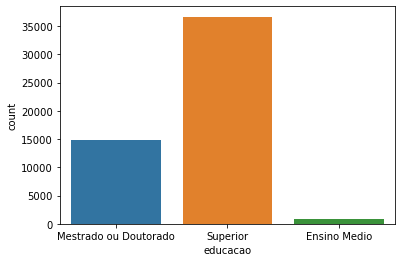

In [19]:
# Criando um grafico de Contagem
sns.countplot(dadosRH['educacao'])

In [20]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


C:\Users\Madalena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

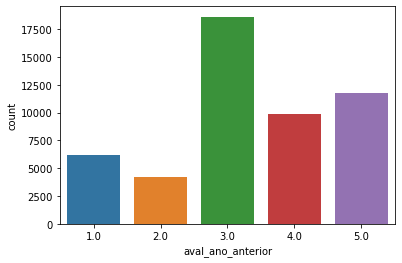

In [21]:
# Criando um grafico de Contagem
sns.countplot(dadosRH['aval_ano_anterior'])

Aplicando inputacao e prenchendo os valores ausentes

In [24]:
# Vamos Calcular a moda e preencher os dados vazios na coluna Educacao
# O metod @fillna preenche os valores ausentes
# O metodo @mode calcula a moda da coluna
# o metodo inplace substitui o valores
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)

In [25]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao                  0
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [28]:
# nesta tabela aplicamos a median (mediana)
# nao usamos a media porque pode ser afectado por valores ausentes
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace =True)

In [29]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [30]:
dadosRH.shape

(54808, 11)

In [31]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


Vamos verificar o balanceamento de classe na variavel "Promovido"

In [32]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


C:\Users\Madalena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

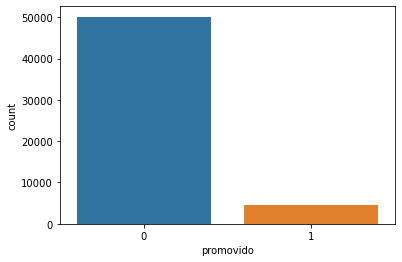

In [33]:
sns.countplot(dadosRH['promovido'])

In [34]:
# A classe esta desbalanceada, treinar um modelo de @ML com classe desbalanceada nao e o correcto 

In [38]:
df_classe_majoritarias = dadosRH[dadosRH.promovido==0]
df_classe_minoritarios = dadosRH[dadosRH.promovido==1]

In [39]:
df_classe_majoritarias.shape

(50140, 11)

In [40]:
df_classe_minoritarios.shape

(4668, 11)

In [44]:
# Aplicando o Upsample da classe minoriatia
from sklearn.utils import resample
df_classe_minoritarios_upsample = resample(df_classe_minoritarios,
                                          replace = True,
                                          n_samples = 50140,
                                          random_state = 150)

In [50]:
dadosRH_balanceados = pd.concat([df_classe_majoritarias, df_classe_minoritarios_upsample ])

In [51]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [53]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


C:\Users\Madalena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

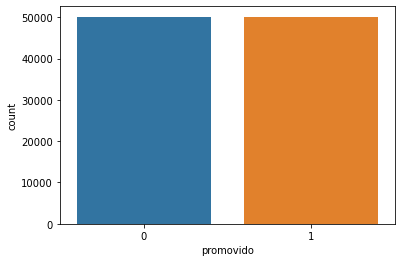

In [54]:
sns.countplot(dadosRH_balanceados['promovido'])

Os dados estao balanceados, o processo de limpeza esta feito. Vamos saolvar os dados no disco (o Novo dataset)

In [55]:
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding = 'utf-8', index = False)

Carregaremos o novo dataset e vamos entrar na parte do Analise.

#### Entrando na Parte do Analise dos dados

In [4]:
dataset = pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [7]:
dataset.shape

(100280, 11)

### Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?

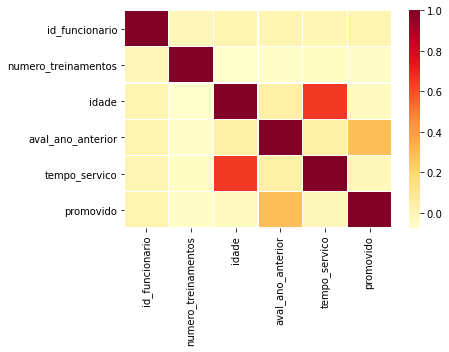

In [11]:
# Vamos usar uma matriz de correcao, @heatmap e um deles.
# isso e um caso estatisco
# A biblioteca Seaborn querer a importacao de matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
# Calculando a correlacao
corr = dataset.corr()
# Plotando o grafio, argumento @cmpa para mapa de corres
# grafico do matplotlib nao do seaborn
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()


# No nosso conjunto de dados temos variaveis numericas e categoricas
# A matriz de correlacao cria-se para variaveis numericas
# Para variaveis categoricas cria-se matriz de associaco
# Para simplicar nesse caso criamos matriz de correlacao porque todas variaveis tem numeros 

### Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?

C:\Users\Madalena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


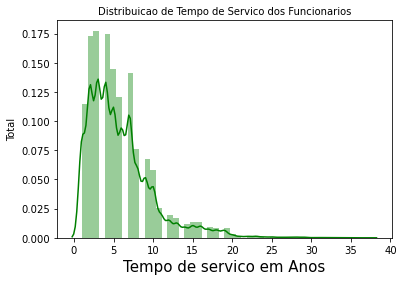

In [13]:
# garfico de distribuicao ajuda no ploblema

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color = 'green')
plt.title('Distribuicao de Tempo de Servico dos Funcionarios', fontsize = 10)
plt.xlabel('Tempo de servico em Anos', fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?

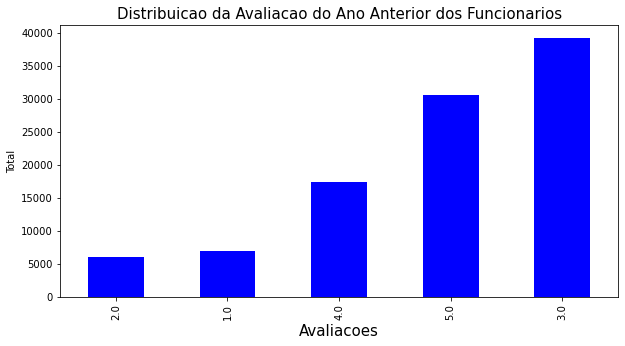

In [15]:
import matplotlib.pyplot as pl
import seaborn as sns
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color = 'blue', figsize = (10, 5))
plt.title('Distribuicao da Avaliacao do Ano Anterior dos Funcionarios', fontsize = 15)
plt.xlabel('Avaliacoes', fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?

C:\Users\Madalena\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


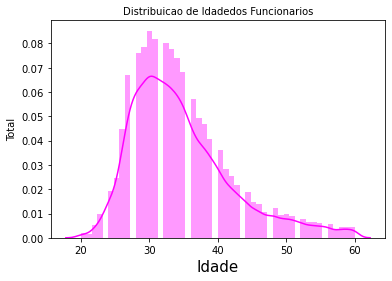

In [16]:
# garfico de distribuicao ajuda no ploblema

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color = 'magenta')
plt.title('Distribuicao de Idadedos Funcionarios', fontsize = 10)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total')
plt.show()

### Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?

C:\Users\Madalena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


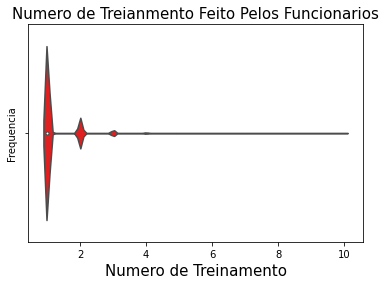

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color = 'red')
plt.title('Numero de Treianmento Feito Pelos Funcionarios', fontsize = 15)
plt.xlabel('Numero de Treinamento', fontsize = 15)
plt.ylabel('Frequencia')
plt.show()

In [19]:
dataset['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

### Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?

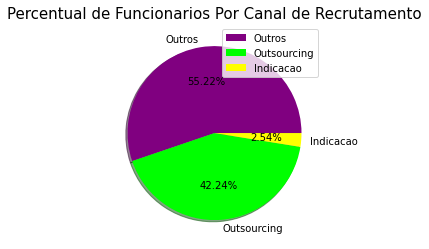

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [ 55375, 42358, 2547]
labels = "Outros", "Outsourcing", "Indicacao"
colors = ['purple', 'lime', 'yellow']
explode = [0, 0, 0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('Percentual de Funcionarios Por Canal de Recrutamento', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

### Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

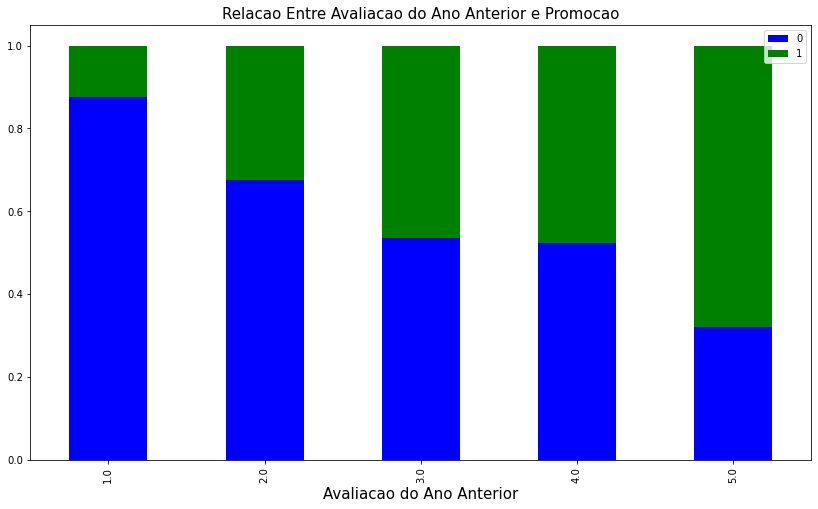

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                  stacked = True,
                                                  figsize = (14, 8),
                                                  color = ['blue' , 'green'])
plt.title('Relacao Entre Avaliacao do Ano Anterior e Promocao', fontsize = 15)
plt.xlabel('Avaliacao do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()